# Python AI: How to Build a Neural Network & Make Predictions

## ML
You would gather data and train a statistical model. Statistical models are mathematically formalized ways to approximate the behavior of a phenomenon.

A common ML task is supervised learning, in which you have a dataset with inputs and known outputs. The task is to use this dataset to train a model that predicts the correct outputs based on the inputs.

## Feature Engineering 

Another name for input data is feature, and feature engineering is the process of extracting features from raw data.

## Deep Learning 

Deep learning is a technique in which you let the neural network figure out by itself which features are important instead of applying feature engineering techniques. The networks can learn the features by themselves.

## Neural Networks: Main Concepts

A neural network is a system that learns how to make predictions by following these steps:

Taking the input data

Making a prediction

Comparing the prediction to the desired output

Adjusting its internal state to predict correctly the next time

*Vectors, layers, and linear regression* are some of the building blocks.

The data is stored as vectors (arrays).

Each layer transforms the data that comes from the previous layer. You can think of each layer as a feature engineering step, because each layer extracts some representation of the data that came previously.

### The Process to Train a Neural Network

*trial and error*.

You start with some *random weights and bias vectors*, make a prediction, compare it to the desired output, and adjust the vectors to predict more accurately the next time.

Knowing when to stop the training and what accuracy target to set is an important aspect of training neural networks, mainly because of overfitting and underfitting scenarios.

#### Vectors and Weights
You represent the vectors as multidimensional arrays. Vectors are useful: *the dot product*. The dot product of two vectors tells you how similar they are in terms of direction and is scaled by the magnitude of the two vectors.

The main vectors inside a neural network are *the weights and bias vectors*.

Loosely, what you want your neural network to do is to check if an input is similar to other inputs it’s already seen. If the new input is similar to previously seen inputs, then the outputs will also be similar. That’s how you get the result of a prediction.

#### The Linear Regression Model

Regression is used when you need to estimate the relationship between a dependent variable and two or more independent variables. Linear regression is a method applied when you approximate the relationship between the variables as linear.

By modeling the relationship between the variables as linear, you can express the dependent variable as a weighted sum of the independent variables.

So, each independent variable will be multiplied by a vector called *weight*. Besides the weights and the independent variables, you also add another vector: *the bia*s. It sets the result when all the other independent variables are equal to zero.

To predict the price of houses based on the area and how old the house is. (using linear regression).

*price = (weights_area * area) + (weights_age * age) + bias*

## Python AI: Starting to Build Your First Neural Network
1 - Generating an output from input data. You’ll do that by creating a weighted sum of the variables.

The goal is to find which of the weights is more similar to the input, taking into account the direction and the magnitude.

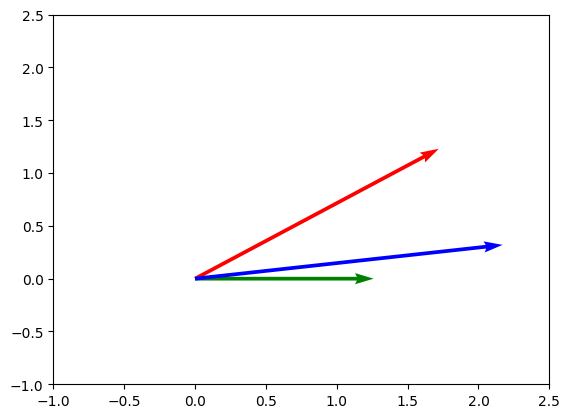

In [1]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

import matplotlib.pyplot as plt
plt.quiver(0, 0, input_vector[0], input_vector[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, weights_1[0], weights_1[1], angles='xy', scale_units='xy', scale=1, color='g')
plt.quiver(0, 0, weights_2[0], weights_2[1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-1, 2.5)
plt.ylim(-1, 2.5)
plt.show()

weights_2 is more similar.

To find that using Python, you’ll apply the dot product.

In [2]:
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult
print(dot_product_1)

# np.dot()

import numpy as np
dot_product_1 = np.dot(input_vector, weights_1)
print(dot_product_1)

2.1672
2.1672


In [3]:
dot_product_2 = np.dot(input_vector, weights_2)
print(dot_product_2)

4.1259999999999994


4.1 > 2.2 so weights_2 is more similar to input_vector

You’ll train a model to make predictions that have only two possible outcomes. (0 or 1). This is a classification problem, a subset of supervised learning problems in which you have a dataset with the inputs and the known targets. (1.66, 1.56 = 1; 2, 1.5 = 0)

The dot product and a sum, both are linear operations -> If you add more layers but keep using only linear operations, then adding more layers would have no effect because each layer will always have some correlation with the input of the previous layer.

*Nonlinear functions (activation functions)*: *The ReLU (rectified linear unit)*, is a function that converts all negative numbers to zero.

The network you’re building will use the sigmoid activation function. The e is a mathematical constant called Euler’s number, and you can use np.exp(x) to calculate eˣ. The Bernoulli distribution is a distribution that has two possible outcomes. The sigmoid function is a good choice if your problem follows the Bernoulli distribution.

<img src="https://realpython.com/cdn-cgi/image/width=2315,format=auto/https://files.realpython.com/media/sigmoid_function.f966c820f8c3.png" width="150">

If the output is greater than 0.5, then you’ll say the prediction is 1. If it’s below 0.5, then you’ll say the prediction is 0.

<img src="https://realpython.com/cdn-cgi/image/width=1400,format=auto/https://files.realpython.com/media/network_architecture.406cfcc68417.png" width="250">

In [4]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

prediction = make_prediction(input_vector, weights_1, bias)
prediction # right

array([0.7985731])

In [5]:
input_vector = np.array([2, 1.5])
prediction = make_prediction(input_vector, weights_1, bias)
prediction # wrong

array([0.87101915])

## Train Your First Neural Network

You assess the error and then adjust the weights. To adjust the weights, you’ll use the *gradient descent and backpropagation algorithms*. Gradient descent is applied to find the direction and the rate to update the parameters.

### Computing the Prediction Error

The function used to measure the error is called the *cost function, or loss function*. The *mean squared error (MSE)* as your cost function. Compute the difference between the prediction and the target then multiply the result by itself. You’ll always end up with a positive value.

In [6]:
target = 0
mse = np.square(prediction - target)
prediction, mse

(array([0.87101915]), array([0.75867436]))

#### Understanding How to Reduce the Error

The goal is to change the weights and bias variables so you can reduce the error. You’ll change only the weights variable and leave the bias fixed for now. You can also get rid of the sigmoid function and use only the result of layer_1. 

You compute the MSE by doing error = np.square(prediction - target). If you treat (prediction - target) as a single variable x, then you have error = np.square(x), which is a quadratic function.

<img src="https://realpython.com/cdn-cgi/image/width=1157,format=auto/https://files.realpython.com/media/quatratic_function.002729dea332.png" width="250">

The error is given by the y-axis. If you’re in point A and want to reduce the error toward 0, then you need to bring the x value down. On the other hand, if you’re in point B and want to reduce the error, then you need to bring the x value up.

To know which direction you should go to reduce the error, you’ll use the derivative. Another word for the derivative is *gradient*. *Gradient descent* is the name of the algorithm used to find the direction and the rate to update the network parameters.

The power rule states that the derivative of xⁿ is nx⁽ⁿ⁻¹⁾. So the derivative of np.square(x) is 2 * x.

If the mean squared error is 0.75, then should you increase or decrease the weights? The result is 1.74, a positive number, so you need to decrease the weights. You do that by subtracting the derivative result of the weights vector.

In [7]:
derivative = 2 * (prediction - target)
print(derivative)

weights_1 = weights_1 - derivative
prediction = make_prediction(input_vector, weights_1, bias)
error = (prediction - target) ** 2
prediction, error

[1.7420383]


(array([0.01496248]), array([0.00022388]))

The error dropped down to almost 0!

High increments aren’t ideal because you could keep going from point A straight to point B, never getting close to zero. To cope with that, you update the weights with a fraction of the derivative result.

To define a *fraction* for updating the weights, you use *the alpha parameter*, also called *the learning rate*. If you decrease the learning rate, then the increments are smaller. If you increase it, then the steps are higher.

Traditional default learning rate values are *0.1, 0.01, and 0.001*.

If you take the new weights and make a prediction with the first input vector, then you’ll see that now it makes a wrong prediction for that one. If your neural network makes a correct prediction for every instance in your training set, then you probably have an overfitted model, where the model simply remembers how to classify the examples instead of learning to notice features in the data.

There are techniques to avoid that, including *regularization the stochastic gradient descent*.

### Applying the Chain Rule

The network you’re building has two layers, and since each layer has its own functions, you’re dealing with a function composition.

To restate the problem, now you want to know how to change weights_1 and bias to reduce the error. You already saw that you can use derivatives for this, but instead of a function with only a sum inside, now you have a function that produces its result using other functions.

Since now you have this function composition, to take the derivative of the error concerning the parameters, you’ll need to use the chain rule from calculus. With the chain rule, you take the partial derivatives of each function, evaluate them, and multiply all the partial derivatives to get the derivative you want.

Now you can start updating the weights. You want to know how to change the weights to decrease the error. This implies that you need to compute the derivative of the error with respect to weights. Since the error is computed by combining different functions, you need to take the partial derivatives of these functions.

<img src="https://realpython.com/cdn-cgi/image/width=1500,format=auto/https://files.realpython.com/media/partial_derivative_weights_2.c792633559c3.png" width="300">

Taking the inverse path of making a prediction and computing the partial derivatives at each function. To calculate the derivative, you multiply all the partial derivatives that follow the path.

derror_dweights = (derror_dprediction * dprediction_dlayer1 * dlayer1_dweights)

For derror_dprediction, you want to know the derivative of the function that computes the error with respect to the prediction value.

This reverse path is called *a backward pass*. In each backward pass, you compute the partial derivatives of each function, substitute the variables by their values, and finally multiply everything. This algorithm to update the neural network parameters is called *backpropagation*.

#### Adjusting the Parameters With Backpropagation

You want to take the derivative of the error function with respect to the bias, derror_dbias. Then you’ll keep going backward, taking the partial derivatives until you find the bias variable.

<img src="https://realpython.com/cdn-cgi/image/width=1500,format=auto/https://files.realpython.com/media/partial_derivative_bias_2.177c16a60b9d.png" width="300">

Take the derivative of the prediction with respect to the previous layer, dprediction_dlayer1. The prediction is the result of the sigmoid function. You can take the derivative of the sigmoid function by multiplying sigmoid(x) and 1 - sigmoid(x). You can use the sigmoid result that has already been computed to compute the derivative of it. You then take this partial derivative and continue going backward. Now you’ll take the derivative of layer_1 with respect to the bias. The bias variable is an independent variable, so the result after applying the power rule is 1. You can put everything together and compute derror_dbias.

To update the weights, you follow the same process, going backward and taking the partial derivatives until you get to the weights variable. Since you’ve already computed some of the partial derivatives, you’ll just need to compute dlayer1_dweights.

In [8]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

## Creating the Neural Network Class

Now you know how to write the expressions to update both the weights and the bias. The NeuralNetwork class generates random start values for the weights and bias variables.

### Training the Network With More Data

You’ve already adjusted the weights and the bias for one data instance, but the goal is to make the network generalize over an entire dataset. *Stochastic gradient descent* is a technique in which, at every iteration, the model makes a prediction based on a randomly selected piece of training data, calculates the error, and updates the parameters.

You’ll save the error over all data points every 100 iterations because you want to plot a chart showing how this metric changes as the number of iterations increases.

You pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.

In [9]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            # Calculate the partial derivatives and return the derivatives for the bias and the weights.
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            # Updates the bias and the weights.
            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    # Accumulate the sum of the errors.
                    # You want to plot a point with the error for all the data instances.
                    cumulative_error = cumulative_error + error
                # You’ll use this array to plot the graph.
                cumulative_errors.append(cumulative_error)

        
        return cumulative_errors

In [10]:
learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
neural_network.predict(input_vector)

np.float64(0.8288794256156597)

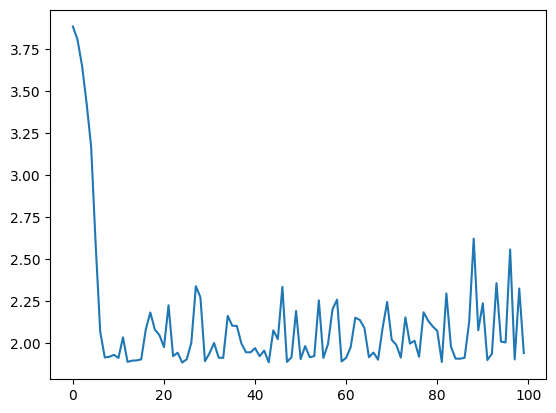

In [11]:
input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)